In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from collections import OrderedDict
import time
from sklearn.metrics import mean_squared_error,roc_auc_score,mean_absolute_error,log_loss
import sys
sys.path.append('benchmark/')
from lvxnn_test import lvxnn
from xgb_test import xgb
from svd_test import svd
from deepfm_fm_test import deepfm_fm
import sys
sys.path.append('../')
from lvxnn.LVXNN import LV_XNN
from lvxnn.DataReader import data_initialize
from lvxnn.utils import local_visualize
from lvxnn.utils import global_visualize_density
from lvxnn.utils import feature_importance_visualize
from lvxnn.utils import plot_trajectory
from lvxnn.utils import plot_regularization
import tensorflow as tf
tf.compat.v1.enable_eager_execution()

data= pd.read_csv('data/simulation/simulation_classification.csv')
task_type = "Classification"

meta_info = OrderedDict()

meta_info['uf_1']={'type': 'continues','source':'user'}
meta_info['uf_2']={'type': 'continues','source':'user'}
meta_info['uf_3']={'type': 'continues','source':'user'}
meta_info['uf_4']={'type': 'continues','source':'user'}
meta_info['uf_5']={'type': 'continues','source':'user'}
meta_info['if_1']={'type': 'continues','source':'item'}
meta_info['if_2']={'type': 'continues','source':'item'}
meta_info['if_3']={'type': 'continues','source':'item'}
meta_info['if_4']={'type': 'continues','source':'item'}
meta_info['if_5']={'type': 'continues','source':'item'}
meta_info['user_id']={"type":"id",'source':'user'}
meta_info['item_id']={"type":"id",'source':'item'}
meta_info['target']={"type":"target",'source':''}
#the best shrinkage is 0.840000
#the best combination is 0.768746
lx_params = {
        "rank": 5,
        "main_effect_epochs":70,
        "interaction_epochs" : 2000 ,
        "tuning_epochs" : 50 , 
        "mf_training_iters": 300,
        "u_group_num":50,
        "i_group_num":50,
        "best_shrinkage":0.8,
        "best_combination":0.85,
        "auto_tune":True,
        "verbose":False
    }

deepfm_fm_params = {
        "epochs":200,
        "loss_type" : 'logloss' ,
        "eval_metric" : log_loss , 
        "greater_is_better": False,
        "verbose":True,
        "early_stopping":True
    }


W0723 10:37:42.254548 33596 deprecation.py:323] From C:\Users\64161\Anaconda3\lib\site-packages\tensorflow_core\python\compat\v2_compat.py:65: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
result_lvxnn = lvxnn('warm',data, meta_info,task_type , random_state=0, params=lx_params)
result_svd = svd('warm',data, meta_info, task_type , random_state=0)
result_deepfm, result_fm = deepfm_fm('warm',data, meta_info,task_type , random_state=0, params=deepfm_fm_params)
result_xgb = xgb('warm',data, meta_info, task_type , random_state=0)

result_sim_re = pd.concat([result_lvxnn,result_svd,result_xgb,result_deepfm,result_fm],0)

result_sim_re.to_csv('result/simulation_classification_result.csv',index=None)

..\lvxnn\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


Memory usage of dataframe is 0.86 MB
Memory usage after optimization is: 0.26 MB
Decreased by 69.6%
Memory usage of dataframe is 0.21 MB
Memory usage after optimization is: 0.07 MB
Decreased by 69.6%
test cold start user: 0
test cold start item: 4
validation cold start user: 0
validation cold start item: 2


..\lvxnn\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)
W0723 10:37:45.503029 33596 deprecation.py:506] From benchmark/deepfm\DeepFM.py:93: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


{'embedding_size': 5, 'deep_layers': [32, 32], 'use_deep': True, 'use_fm': True, 'deep_layers_activation': <function relu at 0x000001D5C89D70D0>, 'loss_type': 'logloss', 'epoch': 200, 'batch_size': 500, 'learning_rate': 0.01, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function log_loss at 0x000001D5C71B3A60>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 9718
[1] train-result=0.6722, valid-result=0.6765 [0.3 s]
[2] train-result=0.6564, valid-result=0.6621 [0.1 s]
[3] train-result=0.6326, valid-result=0.6424 [0.1 s]
[4] train-result=0.5441, valid-result=0.5666 [0.1 s]
[5] train-result=0.2772, valid-result=0.3434 [0.1 s]
[6] train-result=0.1785, valid-result=0.2785 [0.1 s]
[7] train-result=0.1765, valid-result=0.2731 [0.1 s]
[8] train-result=0.1642, valid-result=0.2700 [0.1 s]
[9] train-result=0.1516, valid-result=0.2683 [0.1 s]
[10] train-result=0.1472, valid-resu

..\lvxnn\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 5, 'deep_layers': [32, 32], 'use_deep': True, 'use_fm': True, 'deep_layers_activation': <function relu at 0x000001D5C89D70D0>, 'loss_type': 'logloss', 'epoch': 200, 'batch_size': 500, 'learning_rate': 0.01, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function log_loss at 0x000001D5C71B3A60>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 9718
[1] train-result=0.6826, valid-result=0.6845 [0.3 s]
[2] train-result=0.6655, valid-result=0.6690 [0.1 s]
[3] train-result=0.6218, valid-result=0.6300 [0.1 s]
[4] train-result=0.4155, valid-result=0.4513 [0.1 s]
[5] train-result=0.1985, valid-result=0.2836 [0.1 s]
[6] train-result=0.1735, valid-result=0.2721 [0.1 s]
[7] train-result=0.1678, valid-result=0.2680 [0.1 s]
[8] train-result=0.1617, valid-result=0.2661 [0.1 s]
[9] train-result=0.1534, valid-result=0.2689 [0.1 s]
[10] train-result=0.1461, valid-resu

..\lvxnn\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 5, 'deep_layers': [32, 32], 'use_deep': True, 'use_fm': True, 'deep_layers_activation': <function relu at 0x000001D5C89D70D0>, 'loss_type': 'logloss', 'epoch': 200, 'batch_size': 500, 'learning_rate': 0.01, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function log_loss at 0x000001D5C71B3A60>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 9718
[1] train-result=0.6813, valid-result=0.6863 [0.3 s]
[2] train-result=0.6672, valid-result=0.6700 [0.1 s]
[3] train-result=0.6382, valid-result=0.6450 [0.1 s]
[4] train-result=0.5627, valid-result=0.5758 [0.1 s]
[5] train-result=0.3284, valid-result=0.3654 [0.1 s]
[6] train-result=0.1882, valid-result=0.2667 [0.1 s]
[7] train-result=0.1775, valid-result=0.2609 [0.1 s]
[8] train-result=0.1651, valid-result=0.2490 [0.1 s]
[9] train-result=0.1576, valid-result=0.2484 [0.1 s]
[10] train-result=0.1513, valid-resu

..\lvxnn\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 5, 'deep_layers': [32, 32], 'use_deep': True, 'use_fm': True, 'deep_layers_activation': <function relu at 0x000001D5C89D70D0>, 'loss_type': 'logloss', 'epoch': 200, 'batch_size': 500, 'learning_rate': 0.01, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function log_loss at 0x000001D5C71B3A60>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 9718
[1] train-result=0.6856, valid-result=0.6863 [0.3 s]
[2] train-result=0.6707, valid-result=0.6735 [0.1 s]
[3] train-result=0.6095, valid-result=0.6211 [0.1 s]
[4] train-result=0.3286, valid-result=0.3820 [0.1 s]
[5] train-result=0.1834, valid-result=0.2920 [0.1 s]
[6] train-result=0.1708, valid-result=0.2741 [0.1 s]
[7] train-result=0.1599, valid-result=0.2684 [0.1 s]
[8] train-result=0.1538, valid-result=0.2639 [0.1 s]
[9] train-result=0.1487, valid-result=0.2660 [0.1 s]
[10] train-result=0.1439, valid-resu

benchmark\deepfm_fm_test.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if len([(te_Xi[:,1] != 'cold') & (te_Xi[:,0] != 'cold')])!=1:
..\lvxnn\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 5, 'deep_layers': [32, 32], 'use_deep': True, 'use_fm': True, 'deep_layers_activation': <function relu at 0x000001D5C89D70D0>, 'loss_type': 'logloss', 'epoch': 200, 'batch_size': 500, 'learning_rate': 0.01, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function log_loss at 0x000001D5C71B3A60>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 9718
[1] train-result=0.6739, valid-result=0.6761 [0.3 s]
[2] train-result=0.6493, valid-result=0.6554 [0.1 s]
[3] train-result=0.5166, valid-result=0.5422 [0.1 s]
[4] train-result=0.2318, valid-result=0.3017 [0.1 s]
[5] train-result=0.1839, valid-result=0.2841 [0.1 s]
[6] train-result=0.1720, valid-result=0.2746 [0.1 s]
[7] train-result=0.1602, valid-result=0.2705 [0.1 s]
[8] train-result=0.1620, valid-result=0.2719 [0.1 s]
[9] train-result=0.1508, valid-result=0.2709 [0.1 s]
[10] train-result=0.1441, valid-resu

benchmark\deepfm_fm_test.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if len([(te_Xi[:,1] != 'cold') & (te_Xi[:,0] != 'cold')])!=1:
..\lvxnn\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 5, 'deep_layers': [32, 32], 'use_deep': True, 'use_fm': True, 'deep_layers_activation': <function relu at 0x000001D5C89D70D0>, 'loss_type': 'logloss', 'epoch': 200, 'batch_size': 500, 'learning_rate': 0.01, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function log_loss at 0x000001D5C71B3A60>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 9718
[1] train-result=0.7047, valid-result=0.7062 [0.3 s]
[2] train-result=0.6863, valid-result=0.6901 [0.1 s]
[3] train-result=0.6226, valid-result=0.6315 [0.1 s]
[4] train-result=0.3375, valid-result=0.3751 [0.1 s]
[5] train-result=0.1991, valid-result=0.2741 [0.1 s]
[6] train-result=0.1761, valid-result=0.2608 [0.1 s]
[7] train-result=0.1639, valid-result=0.2571 [0.1 s]
[8] train-result=0.1654, valid-result=0.2585 [0.1 s]
[9] train-result=0.1568, valid-result=0.2579 [0.1 s]
[10] train-result=0.1523, valid-resu

..\lvxnn\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 5, 'deep_layers': [32, 32], 'use_deep': True, 'use_fm': True, 'deep_layers_activation': <function relu at 0x000001D5C89D70D0>, 'loss_type': 'logloss', 'epoch': 200, 'batch_size': 500, 'learning_rate': 0.01, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function log_loss at 0x000001D5C71B3A60>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 9718
[1] train-result=0.6895, valid-result=0.6902 [0.3 s]
[2] train-result=0.6679, valid-result=0.6697 [0.1 s]
[3] train-result=0.5824, valid-result=0.5920 [0.1 s]
[4] train-result=0.2847, valid-result=0.3247 [0.1 s]
[5] train-result=0.1909, valid-result=0.2649 [0.1 s]
[6] train-result=0.1749, valid-result=0.2534 [0.1 s]
[7] train-result=0.1588, valid-result=0.2518 [0.1 s]
[8] train-result=0.1532, valid-result=0.2527 [0.1 s]
[9] train-result=0.1519, valid-result=0.2563 [0.1 s]
[10] train-result=0.1491, valid-resu

benchmark\deepfm_fm_test.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if len([(te_Xi[:,1] != 'cold') & (te_Xi[:,0] != 'cold')])!=1:
..\lvxnn\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 5, 'deep_layers': [32, 32], 'use_deep': True, 'use_fm': True, 'deep_layers_activation': <function relu at 0x000001D5C89D70D0>, 'loss_type': 'logloss', 'epoch': 200, 'batch_size': 500, 'learning_rate': 0.01, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function log_loss at 0x000001D5C71B3A60>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 9718
[1] train-result=0.6857, valid-result=0.6887 [0.3 s]
[2] train-result=0.6675, valid-result=0.6726 [0.1 s]
[3] train-result=0.6148, valid-result=0.6266 [0.1 s]
[4] train-result=0.3872, valid-result=0.4277 [0.1 s]
[5] train-result=0.2035, valid-result=0.2805 [0.1 s]
[6] train-result=0.1842, valid-result=0.2673 [0.1 s]
[7] train-result=0.1707, valid-result=0.2596 [0.1 s]
[8] train-result=0.1682, valid-result=0.2660 [0.1 s]
[9] train-result=0.1674, valid-result=0.2640 [0.1 s]
[10] train-result=0.1600, valid-resu

benchmark\deepfm_fm_test.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if len([(te_Xi[:,1] != 'cold') & (te_Xi[:,0] != 'cold')])!=1:
..\lvxnn\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 5, 'deep_layers': [32, 32], 'use_deep': True, 'use_fm': True, 'deep_layers_activation': <function relu at 0x000001D5C89D70D0>, 'loss_type': 'logloss', 'epoch': 200, 'batch_size': 500, 'learning_rate': 0.01, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function log_loss at 0x000001D5C71B3A60>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 9718
[1] train-result=0.6975, valid-result=0.6959 [0.3 s]
[2] train-result=0.6811, valid-result=0.6834 [0.1 s]
[3] train-result=0.6319, valid-result=0.6385 [0.1 s]
[4] train-result=0.4275, valid-result=0.4619 [0.1 s]
[5] train-result=0.2075, valid-result=0.2897 [0.1 s]
[6] train-result=0.1857, valid-result=0.2695 [0.1 s]
[7] train-result=0.1697, valid-result=0.2662 [0.1 s]
[8] train-result=0.1631, valid-result=0.2611 [0.1 s]
[9] train-result=0.1645, valid-result=0.2676 [0.1 s]
[10] train-result=0.1561, valid-resu

..\lvxnn\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 5, 'deep_layers': [32, 32], 'use_deep': True, 'use_fm': True, 'deep_layers_activation': <function relu at 0x000001D5C89D70D0>, 'loss_type': 'logloss', 'epoch': 200, 'batch_size': 500, 'learning_rate': 0.01, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function log_loss at 0x000001D5C71B3A60>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 9718
[1] train-result=0.6748, valid-result=0.6713 [0.3 s]
[2] train-result=0.6546, valid-result=0.6548 [0.1 s]
[3] train-result=0.5833, valid-result=0.5897 [0.1 s]
[4] train-result=0.3360, valid-result=0.3720 [0.1 s]
[5] train-result=0.2049, valid-result=0.2918 [0.1 s]
[6] train-result=0.1871, valid-result=0.2766 [0.1 s]
[7] train-result=0.1842, valid-result=0.2686 [0.1 s]
[8] train-result=0.1698, valid-result=0.2649 [0.1 s]
[9] train-result=0.1703, valid-result=0.2662 [0.1 s]
[10] train-result=0.1638, valid-resu

C:\Users\64161\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:2174: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\64161\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:2174: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\64161\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:2174: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\64161\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:2174: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)


[66] train-result=nan, valid-result=nan [0.1 s]
#params: 9718
[1] train-result=0.6890, valid-result=0.6900 [0.3 s]
[2] train-result=0.6753, valid-result=0.6774 [0.1 s]
[3] train-result=0.6442, valid-result=0.6492 [0.2 s]
[4] train-result=0.5494, valid-result=0.5655 [0.1 s]
[5] train-result=0.3228, valid-result=0.3637 [0.1 s]
[6] train-result=0.2018, valid-result=0.2682 [0.1 s]
[7] train-result=0.1927, valid-result=0.2626 [0.1 s]
[8] train-result=0.1891, valid-result=0.2668 [0.1 s]
[9] train-result=0.1667, valid-result=0.2517 [0.1 s]
[10] train-result=0.1603, valid-result=0.2542 [0.1 s]
[11] train-result=0.1570, valid-result=0.2587 [0.1 s]
[12] train-result=0.1530, valid-result=0.2604 [0.1 s]
[13] train-result=0.1515, valid-result=0.2639 [0.1 s]
#params: 9718
[1] train-result=0.6874, valid-result=0.6919 [0.3 s]
[2] train-result=0.6598, valid-result=0.6666 [0.1 s]
[3] train-result=0.5328, valid-result=0.5567 [0.1 s]
[4] train-result=0.2449, valid-result=0.3192 [0.1 s]
[5] train-result=0.

..\lvxnn\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 5, 'deep_layers': [32, 32], 'use_deep': False, 'use_fm': True, 'deep_layers_activation': <function relu at 0x000001D5C89D70D0>, 'loss_type': 'logloss', 'epoch': 200, 'batch_size': 500, 'learning_rate': 0.01, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function log_loss at 0x000001D5C71B3A60>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 9686
[1] train-result=0.6612, valid-result=0.6636 [0.2 s]
[2] train-result=0.5955, valid-result=0.6095 [0.1 s]
[3] train-result=0.4745, valid-result=0.5127 [0.1 s]
[4] train-result=0.3363, valid-result=0.4037 [0.1 s]
[5] train-result=0.2298, valid-result=0.3219 [0.1 s]
[6] train-result=0.1711, valid-result=0.2784 [0.1 s]
[7] train-result=0.1514, valid-result=0.2705 [0.1 s]
[8] train-result=0.1428, valid-result=0.2740 [0.1 s]
[9] train-result=0.1384, valid-result=0.2775 [0.1 s]
[10] train-result=0.1350, valid-res

..\lvxnn\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 5, 'deep_layers': [32, 32], 'use_deep': False, 'use_fm': True, 'deep_layers_activation': <function relu at 0x000001D5C89D70D0>, 'loss_type': 'logloss', 'epoch': 200, 'batch_size': 500, 'learning_rate': 0.01, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function log_loss at 0x000001D5C71B3A60>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 9686
[1] train-result=0.6976, valid-result=0.7021 [0.2 s]
[2] train-result=0.6396, valid-result=0.6601 [0.1 s]
[3] train-result=0.5653, valid-result=0.5936 [0.1 s]
[4] train-result=0.4656, valid-result=0.5152 [0.1 s]
[5] train-result=0.3627, valid-result=0.4245 [0.1 s]
[6] train-result=0.2806, valid-result=0.3564 [0.1 s]
[7] train-result=0.2267, valid-result=0.3134 [0.1 s]
[8] train-result=0.1944, valid-result=0.2884 [0.1 s]
[9] train-result=0.1749, valid-result=0.2819 [0.1 s]
[10] train-result=0.1638, valid-res

..\lvxnn\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 5, 'deep_layers': [32, 32], 'use_deep': False, 'use_fm': True, 'deep_layers_activation': <function relu at 0x000001D5C89D70D0>, 'loss_type': 'logloss', 'epoch': 200, 'batch_size': 500, 'learning_rate': 0.01, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function log_loss at 0x000001D5C71B3A60>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 9686
[1] train-result=0.6684, valid-result=0.6721 [0.2 s]
[2] train-result=0.6098, valid-result=0.6199 [0.1 s]
[3] train-result=0.4811, valid-result=0.5043 [0.1 s]
[4] train-result=0.3220, valid-result=0.3629 [0.1 s]
[5] train-result=0.2123, valid-result=0.2714 [0.1 s]
[6] train-result=0.1672, valid-result=0.2497 [0.1 s]
[7] train-result=0.1515, valid-result=0.2501 [0.1 s]
[8] train-result=0.1449, valid-result=0.2569 [0.1 s]
[9] train-result=0.1400, valid-result=0.2565 [0.1 s]
[10] train-result=0.1379, valid-res

..\lvxnn\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 5, 'deep_layers': [32, 32], 'use_deep': False, 'use_fm': True, 'deep_layers_activation': <function relu at 0x000001D5C89D70D0>, 'loss_type': 'logloss', 'epoch': 200, 'batch_size': 500, 'learning_rate': 0.01, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function log_loss at 0x000001D5C71B3A60>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 9686
[1] train-result=0.6580, valid-result=0.6602 [0.2 s]
[2] train-result=0.5914, valid-result=0.6036 [0.1 s]
[3] train-result=0.4476, valid-result=0.4841 [0.1 s]
[4] train-result=0.2794, valid-result=0.3460 [0.1 s]
[5] train-result=0.1874, valid-result=0.2789 [0.1 s]
[6] train-result=0.1541, valid-result=0.2673 [0.1 s]
[7] train-result=0.1426, valid-result=0.2721 [0.1 s]
[8] train-result=0.1368, valid-result=0.2754 [0.1 s]
[9] train-result=0.1349, valid-result=0.2830 [0.1 s]
[10] train-result=0.1317, valid-res

benchmark\deepfm_fm_test.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if len([(te_Xi[:,1] != 'cold') & (te_Xi[:,0] != 'cold')])!=1:
..\lvxnn\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 5, 'deep_layers': [32, 32], 'use_deep': False, 'use_fm': True, 'deep_layers_activation': <function relu at 0x000001D5C89D70D0>, 'loss_type': 'logloss', 'epoch': 200, 'batch_size': 500, 'learning_rate': 0.01, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function log_loss at 0x000001D5C71B3A60>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 9686
[1] train-result=0.6898, valid-result=0.6915 [0.2 s]
[2] train-result=0.6413, valid-result=0.6522 [0.1 s]
[3] train-result=0.5237, valid-result=0.5607 [0.1 s]
[4] train-result=0.3607, valid-result=0.4266 [0.1 s]
[5] train-result=0.2380, valid-result=0.3266 [0.1 s]
[6] train-result=0.1777, valid-result=0.2868 [0.1 s]
[7] train-result=0.1541, valid-result=0.2799 [0.1 s]
[8] train-result=0.1471, valid-result=0.2897 [0.1 s]
[9] train-result=0.1390, valid-result=0.2875 [0.1 s]
[10] train-result=0.1358, valid-res

benchmark\deepfm_fm_test.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if len([(te_Xi[:,1] != 'cold') & (te_Xi[:,0] != 'cold')])!=1:
..\lvxnn\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 5, 'deep_layers': [32, 32], 'use_deep': False, 'use_fm': True, 'deep_layers_activation': <function relu at 0x000001D5C89D70D0>, 'loss_type': 'logloss', 'epoch': 200, 'batch_size': 500, 'learning_rate': 0.01, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function log_loss at 0x000001D5C71B3A60>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 9686
[1] train-result=0.6831, valid-result=0.6844 [0.2 s]
[2] train-result=0.6228, valid-result=0.6386 [0.1 s]
[3] train-result=0.4886, valid-result=0.5178 [0.1 s]
[4] train-result=0.3194, valid-result=0.3728 [0.1 s]
[5] train-result=0.2097, valid-result=0.2844 [0.1 s]
[6] train-result=0.1732, valid-result=0.2701 [0.1 s]
[7] train-result=0.1560, valid-result=0.2687 [0.1 s]
[8] train-result=0.1493, valid-result=0.2709 [0.1 s]
[9] train-result=0.1455, valid-result=0.2728 [0.1 s]
[10] train-result=0.1431, valid-res

..\lvxnn\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 5, 'deep_layers': [32, 32], 'use_deep': False, 'use_fm': True, 'deep_layers_activation': <function relu at 0x000001D5C89D70D0>, 'loss_type': 'logloss', 'epoch': 200, 'batch_size': 500, 'learning_rate': 0.01, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function log_loss at 0x000001D5C71B3A60>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 9686
[1] train-result=0.6595, valid-result=0.6597 [0.2 s]
[2] train-result=0.6117, valid-result=0.6168 [0.1 s]
[3] train-result=0.4923, valid-result=0.5112 [0.1 s]
[4] train-result=0.3242, valid-result=0.3627 [0.1 s]
[5] train-result=0.2074, valid-result=0.2703 [0.1 s]
[6] train-result=0.1644, valid-result=0.2570 [0.1 s]
[7] train-result=0.1505, valid-result=0.2616 [0.1 s]
[8] train-result=0.1420, valid-result=0.2721 [0.1 s]
[9] train-result=0.1387, valid-result=0.2766 [0.1 s]
[10] train-result=0.1410, valid-res

benchmark\deepfm_fm_test.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if len([(te_Xi[:,1] != 'cold') & (te_Xi[:,0] != 'cold')])!=1:
..\lvxnn\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 5, 'deep_layers': [32, 32], 'use_deep': False, 'use_fm': True, 'deep_layers_activation': <function relu at 0x000001D5C89D70D0>, 'loss_type': 'logloss', 'epoch': 200, 'batch_size': 500, 'learning_rate': 0.01, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function log_loss at 0x000001D5C71B3A60>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 9686
[1] train-result=0.6743, valid-result=0.6739 [0.2 s]
[2] train-result=0.6100, valid-result=0.6192 [0.1 s]
[3] train-result=0.4876, valid-result=0.5181 [0.1 s]
[4] train-result=0.3427, valid-result=0.3995 [0.1 s]
[5] train-result=0.2362, valid-result=0.3121 [0.1 s]
[6] train-result=0.1830, valid-result=0.2755 [0.1 s]
[7] train-result=0.1606, valid-result=0.2634 [0.1 s]
[8] train-result=0.1510, valid-result=0.2654 [0.1 s]
[9] train-result=0.1468, valid-result=0.2705 [0.1 s]
[10] train-result=0.1446, valid-res

benchmark\deepfm_fm_test.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if len([(te_Xi[:,1] != 'cold') & (te_Xi[:,0] != 'cold')])!=1:
..\lvxnn\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 5, 'deep_layers': [32, 32], 'use_deep': False, 'use_fm': True, 'deep_layers_activation': <function relu at 0x000001D5C89D70D0>, 'loss_type': 'logloss', 'epoch': 200, 'batch_size': 500, 'learning_rate': 0.01, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function log_loss at 0x000001D5C71B3A60>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 9686
[1] train-result=0.6600, valid-result=0.6617 [0.2 s]
[2] train-result=0.5823, valid-result=0.5987 [0.1 s]
[3] train-result=0.4349, valid-result=0.4727 [0.1 s]
[4] train-result=0.2777, valid-result=0.3378 [0.1 s]
[5] train-result=0.1914, valid-result=0.2707 [0.1 s]
[6] train-result=0.1618, valid-result=0.2605 [0.1 s]
[7] train-result=0.1513, valid-result=0.2633 [0.1 s]
[8] train-result=0.1452, valid-result=0.2650 [0.1 s]
[9] train-result=0.1427, valid-result=0.2696 [0.1 s]
[10] train-result=0.1515, valid-res

..\lvxnn\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 5, 'deep_layers': [32, 32], 'use_deep': False, 'use_fm': True, 'deep_layers_activation': <function relu at 0x000001D5C89D70D0>, 'loss_type': 'logloss', 'epoch': 200, 'batch_size': 500, 'learning_rate': 0.01, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function log_loss at 0x000001D5C71B3A60>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 9686
[1] train-result=0.6750, valid-result=0.6778 [0.2 s]
[2] train-result=0.6104, valid-result=0.6238 [0.1 s]
[3] train-result=0.4700, valid-result=0.5067 [0.1 s]
[4] train-result=0.3073, valid-result=0.3716 [0.1 s]
[5] train-result=0.2058, valid-result=0.2958 [0.1 s]
[6] train-result=0.1674, valid-result=0.2773 [0.1 s]
[7] train-result=0.1576, valid-result=0.2806 [0.1 s]
[8] train-result=0.1484, valid-result=0.2817 [0.1 s]
[9] train-result=0.1445, valid-result=0.2825 [0.1 s]
[10] train-result=0.1421, valid-res

## explanation

In [14]:
data= pd.read_csv('data/simulation/simulation_classification.csv')
task_type = "Classification"

meta_info = OrderedDict()

meta_info['uf_1']={'type': 'continues','source':'user'}
meta_info['uf_2']={'type': 'continues','source':'user'}
meta_info['uf_3']={'type': 'continues','source':'user'}
meta_info['uf_4']={'type': 'continues','source':'user'}
meta_info['uf_5']={'type': 'continues','source':'user'}
meta_info['if_1']={'type': 'continues','source':'item'}
meta_info['if_2']={'type': 'continues','source':'item'}
meta_info['if_3']={'type': 'continues','source':'item'}
meta_info['if_4']={'type': 'continues','source':'item'}
meta_info['if_5']={'type': 'continues','source':'item'}
meta_info['user_id']={"type":"id",'source':'user'}
meta_info['item_id']={"type":"id",'source':'item'}
meta_info['target']={"type":"target",'source':''}
train , test = train_test_split(data,test_size=0.2 ,random_state=0)
tr_x, tr_Xi, tr_y, tr_idx, te_x, te_Xi, te_y, val_x, val_Xi, val_y, val_idx, meta_info, model_info, sy, sy_t = data_initialize(train,test,meta_info,task_type ,'warm', 0, True)
model = LV_XNN(model_info=model_info, meta_info=meta_info, subnet_arch=[8, 16],interact_arch=[20, 10],activation_func=tf.tanh, batch_size=1000, lr_bp=0.01, auto_tune=False,
               interaction_epochs=2000,main_effect_epochs=70,tuning_epochs=50,loss_threshold_main=0.01,loss_threshold_inter=0.01,alpha=0,combine_range=0.8,epsilon=0,
              verbose=True,val_ratio=0.125, early_stop_thres=100,interact_num=10,u_group_num=50,i_group_num=50,scale_ratio=0.8,n_power_iterations=5,n_oversamples=0,
              mf_training_iters=300,change_mode=True,convergence_threshold=0.001,max_rank=5,shrinkage_value=20,wc='warm')
model.fit(tr_x, val_x, tr_y, val_y, tr_Xi, val_Xi, tr_idx, val_idx)

..\lvxnn\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


Memory usage of dataframe is 0.86 MB
Memory usage after optimization is: 0.26 MB
Decreased by 69.6%
Memory usage of dataframe is 0.21 MB
Memory usage after optimization is: 0.07 MB
Decreased by 69.6%
test cold start user: 0
test cold start item: 4
validation cold start user: 0
validation cold start item: 2
ListWrapper(['uf_1', 'uf_2', 'uf_3', 'uf_4', 'uf_5', 'if_1', 'if_2', 'if_3', 'if_4', 'if_5'])
####################GAMI-Net training start.####################
##########Stage 1: main effect training start.##########
Main effects training epoch: 1, train loss: 0.68837, val loss: 0.68561
Main effects training epoch: 2, train loss: 0.68061, val loss: 0.67765
Main effects training epoch: 3, train loss: 0.66495, val loss: 0.66057
Main effects training epoch: 4, train loss: 0.63676, val loss: 0.62868
Main effects training epoch: 5, train loss: 0.62048, val loss: 0.60550
Main effects training epoch: 6, train loss: 0.60920, val loss: 0.58944
Main effects training epoch: 7, train loss: 0.5897

Main effects tuning epoch: 44, train loss: 0.50831, val loss: 0.48741
Main effects tuning epoch: 45, train loss: 0.50842, val loss: 0.48752
Main effects tuning epoch: 46, train loss: 0.50826, val loss: 0.48664
Main effects tuning epoch: 47, train loss: 0.50818, val loss: 0.48726
Main effects tuning epoch: 48, train loss: 0.50822, val loss: 0.48696
Main effects tuning epoch: 49, train loss: 0.50813, val loss: 0.48605
Main effects tuning epoch: 50, train loss: 0.50818, val loss: 0.48708
##########Stage 2: interaction training start.##########
Interaction training epoch: 1, train loss: 0.49174, val loss: 0.47035
Interaction training epoch: 2, train loss: 0.37729, val loss: 0.35543
Interaction training epoch: 3, train loss: 0.35728, val loss: 0.31402
Interaction training epoch: 4, train loss: 0.33004, val loss: 0.29338
Interaction training epoch: 5, train loss: 0.32288, val loss: 0.29349
Interaction training epoch: 6, train loss: 0.31747, val loss: 0.29187
Interaction training epoch: 7, tr

Interaction training epoch: 109, train loss: 0.26632, val loss: 0.24758
Interaction training epoch: 110, train loss: 0.26693, val loss: 0.24931
Interaction training epoch: 111, train loss: 0.26205, val loss: 0.24377
Interaction training epoch: 112, train loss: 0.26883, val loss: 0.24993
Interaction training epoch: 113, train loss: 0.26540, val loss: 0.25076
Interaction training epoch: 114, train loss: 0.26479, val loss: 0.24373
Interaction training epoch: 115, train loss: 0.26471, val loss: 0.25068
Interaction training epoch: 116, train loss: 0.26381, val loss: 0.24557
Interaction training epoch: 117, train loss: 0.26482, val loss: 0.24687
Interaction training epoch: 118, train loss: 0.26546, val loss: 0.24734
Interaction training epoch: 119, train loss: 0.26452, val loss: 0.24701
Interaction training epoch: 120, train loss: 0.26347, val loss: 0.24720
Interaction training epoch: 121, train loss: 0.26449, val loss: 0.24677
Interaction training epoch: 122, train loss: 0.26731, val loss: 

Interaction training epoch: 225, train loss: 0.24676, val loss: 0.23398
Interaction training epoch: 226, train loss: 0.25016, val loss: 0.23569
Interaction training epoch: 227, train loss: 0.24497, val loss: 0.23170
Interaction training epoch: 228, train loss: 0.24741, val loss: 0.23605
Interaction training epoch: 229, train loss: 0.24811, val loss: 0.23539
Interaction training epoch: 230, train loss: 0.24738, val loss: 0.23663
Interaction training epoch: 231, train loss: 0.25943, val loss: 0.24143
Interaction training epoch: 232, train loss: 0.25211, val loss: 0.24492
Interaction training epoch: 233, train loss: 0.25046, val loss: 0.23334
Interaction training epoch: 234, train loss: 0.25195, val loss: 0.24199
Interaction training epoch: 235, train loss: 0.25053, val loss: 0.23706
Interaction training epoch: 236, train loss: 0.24800, val loss: 0.23599
Interaction training epoch: 237, train loss: 0.24749, val loss: 0.23997
Interaction training epoch: 238, train loss: 0.24563, val loss: 

Interaction training epoch: 342, train loss: 0.23734, val loss: 0.23463
Interaction training epoch: 343, train loss: 0.23942, val loss: 0.22652
Interaction training epoch: 344, train loss: 0.23517, val loss: 0.22907
Interaction training epoch: 345, train loss: 0.24511, val loss: 0.23431
Interaction training epoch: 346, train loss: 0.24048, val loss: 0.23238
Interaction training epoch: 347, train loss: 0.24471, val loss: 0.23264
Interaction training epoch: 348, train loss: 0.24162, val loss: 0.23272
Interaction training epoch: 349, train loss: 0.23835, val loss: 0.22731
Interaction training epoch: 350, train loss: 0.24020, val loss: 0.23523
Interaction training epoch: 351, train loss: 0.23941, val loss: 0.23179
Interaction training epoch: 352, train loss: 0.23626, val loss: 0.22962
Interaction training epoch: 353, train loss: 0.23977, val loss: 0.22920
Interaction training epoch: 354, train loss: 0.23701, val loss: 0.23026
Interaction training epoch: 355, train loss: 0.23637, val loss: 

Interaction training epoch: 456, train loss: 0.23561, val loss: 0.22917
Interaction training epoch: 457, train loss: 0.23096, val loss: 0.22336
Interaction training epoch: 458, train loss: 0.23385, val loss: 0.22913
Interaction training epoch: 459, train loss: 0.22854, val loss: 0.22269
Interaction training epoch: 460, train loss: 0.23197, val loss: 0.22646
Interaction training epoch: 461, train loss: 0.23144, val loss: 0.22502
Interaction training epoch: 462, train loss: 0.23344, val loss: 0.23095
Interaction training epoch: 463, train loss: 0.23425, val loss: 0.22786
Interaction training epoch: 464, train loss: 0.23351, val loss: 0.22665
Interaction training epoch: 465, train loss: 0.23627, val loss: 0.23319
Interaction training epoch: 466, train loss: 0.23221, val loss: 0.22325
Interaction training epoch: 467, train loss: 0.23200, val loss: 0.22767
Interaction training epoch: 468, train loss: 0.23247, val loss: 0.22862
Interaction training epoch: 469, train loss: 0.23158, val loss: 

Interaction training epoch: 574, train loss: 0.22389, val loss: 0.22471
Interaction training epoch: 575, train loss: 0.23051, val loss: 0.22844
Interaction training epoch: 576, train loss: 0.22485, val loss: 0.22302
Interaction training epoch: 577, train loss: 0.23395, val loss: 0.23165
Interaction training epoch: 578, train loss: 0.22775, val loss: 0.22424
Interaction training epoch: 579, train loss: 0.22963, val loss: 0.22958
Interaction training epoch: 580, train loss: 0.22390, val loss: 0.22257
Interaction training epoch: 581, train loss: 0.23131, val loss: 0.23439
Interaction training epoch: 582, train loss: 0.22543, val loss: 0.22705
Interaction training epoch: 583, train loss: 0.22706, val loss: 0.22584
Interaction training epoch: 584, train loss: 0.23550, val loss: 0.23098
Interaction training epoch: 585, train loss: 0.22763, val loss: 0.22611
Interaction training epoch: 586, train loss: 0.23089, val loss: 0.22852
Interaction training epoch: 587, train loss: 0.22669, val loss: 

After the gam stage, training error is 0.22594 , validation error is 0.23026
missing value counts: 92783
[SoftImpute] Max Singular Value of X_init = 4.145981
#####mf_training#####


C:\Users\64161\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\64161\Anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


[SoftImpute] Iter 1: observed BCE=0.173841 validation BCE=0.222081,rank=5


C:\Users\64161\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\64161\Anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


[SoftImpute] Iter 2: observed BCE=0.166723 validation BCE=0.231238,rank=5
[SoftImpute] Iter 3: observed BCE=0.162258 validation BCE=0.218838,rank=5
[SoftImpute] Iter 4: observed BCE=0.159459 validation BCE=0.217510,rank=5
[SoftImpute] Iter 5: observed BCE=0.157062 validation BCE=0.216267,rank=5
[SoftImpute] Iter 6: observed BCE=0.155536 validation BCE=0.215033,rank=5
[SoftImpute] Iter 7: observed BCE=0.153877 validation BCE=0.214335,rank=5
[SoftImpute] Iter 8: observed BCE=0.151949 validation BCE=0.213630,rank=5
[SoftImpute] Iter 9: observed BCE=0.150612 validation BCE=0.212536,rank=5
[SoftImpute] Iter 10: observed BCE=0.148887 validation BCE=0.211738,rank=5
[SoftImpute] Iter 11: observed BCE=0.147746 validation BCE=0.211585,rank=5
[SoftImpute] Iter 12: observed BCE=0.146922 validation BCE=0.210775,rank=5
[SoftImpute] Iter 13: observed BCE=0.146471 validation BCE=0.210196,rank=5
[SoftImpute] Iter 14: observed BCE=0.146456 validation BCE=0.210250,rank=5
[SoftImpute] Iter 15: observed BC

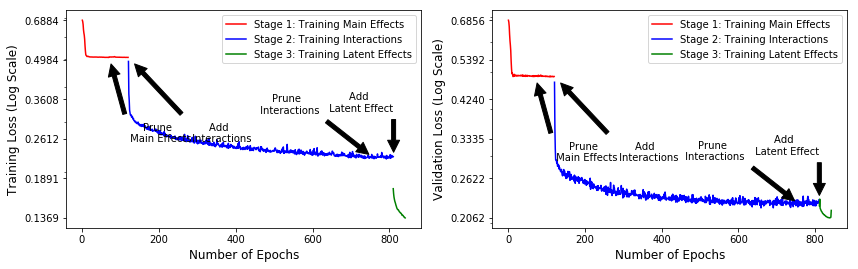

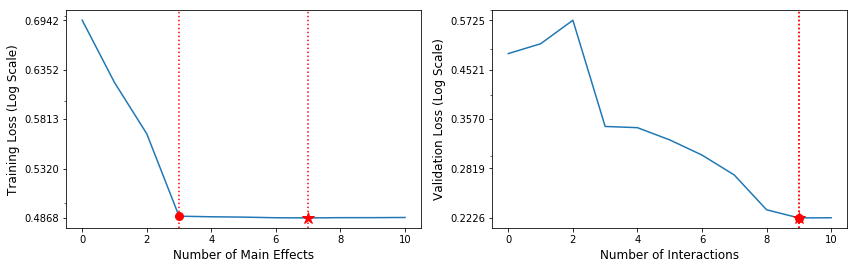

In [15]:
simu_dir = 'result'
data_dict_logs = model.final_gam_model.summary_logs(save_dict=False)
data_dict_logs.update({"err_train_mf":model.final_mf_model.mf_mae,
                       "err_val_mf":model.final_mf_model.mf_valmae})
plot_trajectory(data_dict_logs, folder=simu_dir, name="s1_traj_plot", log_scale=True, save_png=False, save_eps=False)
plot_regularization(data_dict_logs, folder=simu_dir, name="s1_regu_plot", log_scale=True, save_png=False, save_eps=False)

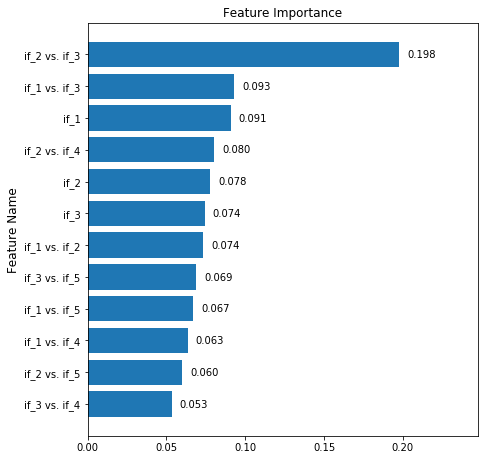

In [16]:
data_dict = model.final_gam_model.global_explain(0,save_dict=False)
feature_importance_visualize(data_dict, save_png=False, folder=simu_dir, name='s1_feature')

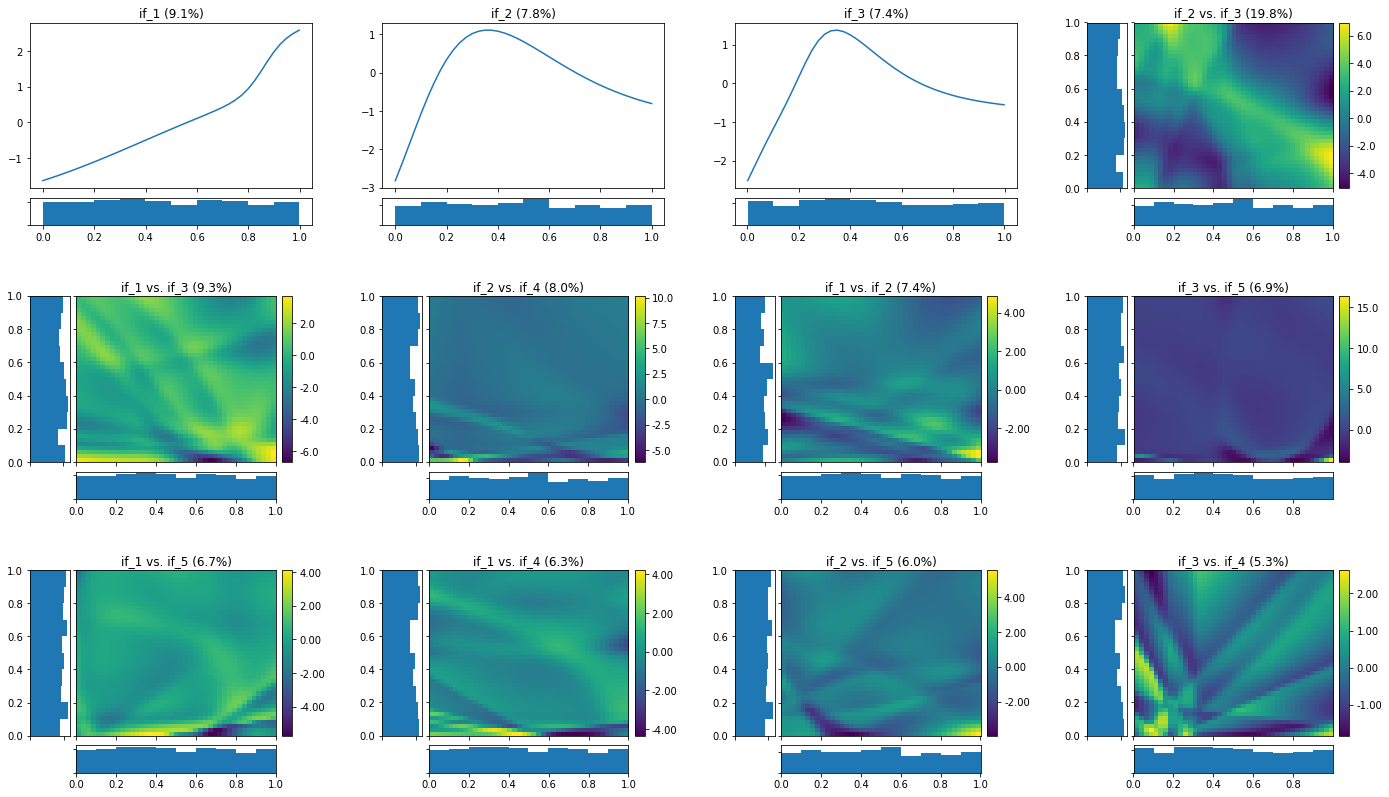

In [17]:
global_visualize_density(data_dict, save_png=False, folder=simu_dir, name='s1_global')

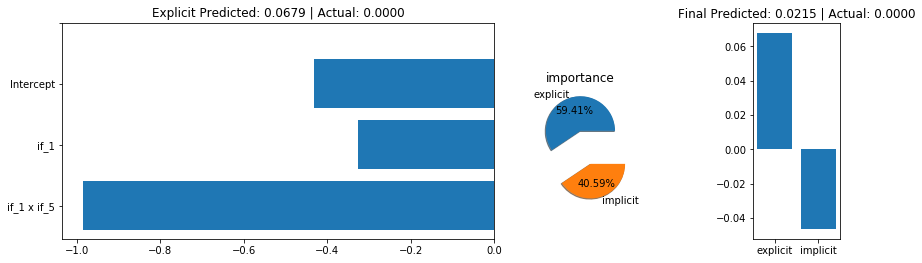

In [18]:
data_dict_local = model.local_explain(0,1,tr_x,tr_Xi,tr_y)
local_visualize(data_dict_local, save_png=False, folder=simu_dir, name='s1_local')

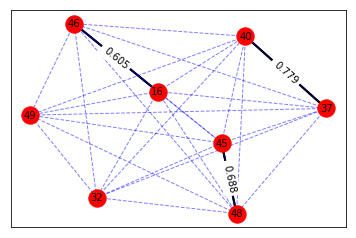

In [21]:
model.mf_distance(0.6,'user')

In [22]:
new = te_x[91,:].reshape(1,-1)
_ = model.cold_start_analysis(new,'item',1.96)

The new item belong to group 45
 mean is [-0.00039877 -0.00419254  0.00230756  0.00130014  0.0015338 ]
 and std is [0.0293766  0.02972326 0.02819392 0.03213293 0.03031439]
 the confidence interval is [[-0.05797691 -0.06245013 -0.05295252 -0.06168041 -0.05788241],[0.05717937 0.05406504 0.05756765 0.06428069 0.06095   ]]
